<div align="center">
    
# Mortgage Risk Modeling
# 2.0 Data Wrangling

## 2.1 Table of Contents<a id='2.1_Table_of_Contents'></a>
* [2.1 Table of Contents](#2.1_Table_of_Contents)
* [2.2 Introduction](#2.2_Introduction)
* [2.3 Library Imports](#2.3_Library_Imports)
* [2.4 Data Loading](#2.4_Data_Loading)
* [2.5 Data Inspection](#2.5_Data_Inspection)
  * [2.5.1 Numerical Features](#2.5.1_Numerical_Features)
  * [2.5.2 Categorical Features](#2.5.2_Categorical_Features)
* [2.6 Data Cleaning](#2.6_Data_Cleaning)
  * [2.6.1 Missing Values](#2.6.1_Missing_Values)
  * [2.6.2 Duplicates](#2.6.2_Duplicates)
  * [2.6.3 Outliers](#2.6.3_Outliers)
* [2.7 Data Transformation](#2.7_Data_Transformation)
* [2.8 Summary](#2.8_Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>

This project focuses on predicting mortgage default and prepayment risks using a consolidated dataset from the Q1 2020 cohort. This specific period serves as a macroeconomic case study, allowing for the evaluation of credit risk models during a timeframe characterized by high market volatility and significant government intervention. By modeling these "stress-test" conditions, the analysis aims to identify robust predictors of loan performance that remain effective even during major economic disruptions.

This notebook is dedicated to the Data Wrangling phase of the machine learning pipeline. The objective is to transform raw loan performance data into a clean, structured "Analytical Base Table" (ABT) suitable for modeling. Key technical priorities include the implementation of custom credit risk logic, the systematic handling of missing data through feature engineering, and the removal of incomplete records to ensure that only loans with established payment histories are utilized for training.

## 2.3 Library Imports<a id='2.3_Library_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 2.4 Data Loading<a id='2.4_Data_Loading'></a>

In [2]:
# Load data from five US states, CO, GA, MI, OH and VA
path='../data/raw/'

file_2020q1_OH=pd.read_csv(path+'file_2020Q1_OH.csv')
file_2020q1_VA=pd.read_csv(path+'file_2020Q1_VA.csv')
file_2020q1_GA=pd.read_csv(path+'file_2020Q1_GA.csv')
file_2020q1_MI=pd.read_csv(path+'file_2020Q1_MI.csv')
file_2020q1_CO=pd.read_csv(path+'file_2020Q1_CO.csv')

In [3]:
# Combine all states into one DataFrame and reset the index
df = pd.concat([file_2020q1_OH, file_2020q1_VA, file_2020q1_GA, file_2020q1_MI, file_2020q1_CO], ignore_index=True)
df.shape

(167630, 108)

In [4]:
df.head()

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
0,NaN,98836743,12020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
1,NaN,98836743,22020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
2,NaN,98836743,32020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
3,NaN,98836743,42020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
4,NaN,98836743,52020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN


In [5]:
# Check row counts for each individual file
print(f"OH: {len(file_2020q1_OH)} rows")
print(f"VA: {len(file_2020q1_VA)} rows")
print(f"GA: {len(file_2020q1_GA)} rows")
print(f"MI: {len(file_2020q1_MI)} rows")
print(f"CO: {len(file_2020q1_CO)} rows")
print(f"Total in df: {len(df)} rows")

OH: 19923 rows
VA: 15931 rows
GA: 38254 rows
MI: 26039 rows
CO: 67483 rows
Total in df: 167630 rows


## 2.5 Data Inspection<a id='2.5_Data_Inspection'></a>

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 167630 entries, 0 to 167629
Columns: 108 entries, POOL_ID to ADR_UPB
dtypes: float64(84), int64(2), str(22)
memory usage: 138.1 MB


### 2.5.1 Numerical Features<a id='2.5.1_Numerical_Features'></a>

In [7]:
# Summary statistics
display(df.describe(include='all'))

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
count,0.0,1.676300e+05,167630.000000,167629,167629,162606,0.0,167629.000000,162606.000000,167628.000000,...,0.0,0.0,0.0,167625,167625,0.0,5023,167625,3615.000000,3605.000000
unique,NaN,NaN,NaN,3,21,26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,1,NaN,2,2,NaN,NaN
top,NaN,NaN,NaN,R,Other,Other,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7,N,NaN,N,7,NaN,NaN
freq,NaN,NaN,NaN,91626,68770,54004,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,161010,167625,NaN,5018,164020,NaN,NaN
mean,NaN,9.887015e+07,60804.946012,NaN,NaN,NaN,NaN,3.983373,3.982233,263176.706755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.021300,10679.181301
std,NaN,2.568713e+04,34701.422407,NaN,NaN,NaN,NaN,0.429567,0.430507,118414.121559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144403,9339.525489
min,NaN,9.883674e+07,22.000000,NaN,NaN,NaN,NaN,2.625000,2.625000,10000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,612.540000
25%,NaN,9.885061e+07,32020.000000,NaN,NaN,NaN,NaN,3.750000,3.750000,171000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4576.690000
50%,NaN,9.886354e+07,62020.000000,NaN,NaN,NaN,NaN,3.875000,3.875000,251000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7683.650000
75%,NaN,9.888279e+07,92020.000000,NaN,NaN,NaN,NaN,4.125000,4.125000,342000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,12880.520000


### 2.5.2 Categorical Features<a id='2.5.2_Categorical_Features'></a>

In [8]:
# Updated to avoid Pandas4Warning
display(df.select_dtypes(include=['object', 'category', 'string']).head())

,CHANNEL,SELLER,SERVICER,FIRST_FLAG,PURPOSE,PROP,OCC_STAT,STATE,PRODUCT,PPMT_FLG,...,MOD_FLAG,SERV_IND,HOMEREADY_PROGRAM_INDICATOR,RELOCATION_MORTGAGE_INDICATOR,PROPERTY_INSPECTION_WAIVER_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,RE_PROCS_FLAG,ADR_TYPE
0,R,Other,Other,N,R,SF,P,OH,FRM,N,...,N,N,N,N,A,N,7,N,NaN,7
1,R,Other,Other,N,R,SF,P,OH,FRM,N,...,N,N,N,N,A,N,7,N,NaN,7
2,R,Other,Other,N,R,SF,P,OH,FRM,N,...,N,N,N,N,A,N,7,N,NaN,7
3,R,Other,Other,N,R,SF,P,OH,FRM,N,...,N,N,N,N,A,N,7,N,NaN,7
4,R,Other,Other,N,R,SF,P,OH,FRM,N,...,N,N,N,N,A,N,7,N,NaN,7


## 2.6 Data Cleaning<a id='2.6_Data_Cleaning'></a>

### 2.6.1 Missing Values<a id='2.6.1_Missing_Values'></a>

In [9]:
# Check missing values
missing = df.isnull().sum()
missing_summary = missing[missing > 0].sort_values(ascending=False).to_frame(name='Missing Count')
missing_summary['Percentage'] = (missing_summary['Missing Count'] / len(df)) * 100

print(f"Total rows in dataset: {len(df)}")
display(missing_summary)

Total rows in dataset: 167630


,Missing Count,Percentage
POOL_ID,167630,100.000000
MASTER_SERVICER,167630,100.000000
ISSUANCE_UPB,167630,100.000000
MNTHS_TO_AMTZ_IO,167630,100.000000
FIRST_PAY_IO,167630,100.000000
...,...,...
ORIG_UPB,2,0.001193
CURRENT_UPB,2,0.001193
ORIG_RATE,1,0.000597
SELLER,1,0.000597


In [10]:
# Identify columns where missing value percentage is 100%
empty_cols = missing_summary[missing_summary['Percentage'] == 100].index.tolist()

print(empty_cols)

['POOL_ID', 'MASTER_SERVICER', 'ISSUANCE_UPB', 'MNTHS_TO_AMTZ_IO', 'FIRST_PAY_IO', 'MI_CANCEL_FLAG', 'BALLOON_INDICATOR', 'MARGIN', 'DEAL_NAME', 'PLAN_NUMBER', 'CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS', 'CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS', 'LOAN_HOLDBACK_INDICATOR', 'ZERO_BALANCE_CODE_CHANGE_DATE', 'LOAN_HOLDBACK_EFFECTIVE_DATE', 'MONTHS_UNTIL_FIRST_PAYMENT_RESET', 'ARM_5_YR_INDICATOR', 'CURR_SCOREC', 'ISSUE_SCOREB', 'ISSUE_SCOREC', 'CURRENT_LIST_PRICE', 'CURRENT_LIST_START_DATE', 'ORIGINAL_LIST_START_DATE', 'CURR_SCOREB', 'CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT', 'CUMULATIVE_MODIFICATION_LOSS_AMOUNT', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 'ORIGINAL_LIST_PRICE', 'CREDIT_ENHANCEMENT_PROCEEDS', 'ASSET_RECOVERY_COSTS', 'NET_SALES_PROCEEDS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 'FORECLOSURE_DATE', 'UNSCHD_PRNCPL_CURR', 

In [11]:
# Drop columns that has no value at all
df.drop(columns=empty_cols, inplace=True)

print(f"Dropped {len(empty_cols)} empty columns.")
print(f"Remaining columns: {df.shape[1]}")

Dropped 52 empty columns.
Remaining columns: 56


In [12]:
# Identify columns with more than 97% missing values
cols_to_drop_97 = missing_summary[missing_summary['Percentage'] > 97].index.tolist()

# Drop these columns from the dataframe
df.drop(columns=cols_to_drop_97, inplace=True, errors='ignore')

print(f"Dropped {len(cols_to_drop_97)} columns with > 97% missing values.")
print(f"New shape of df: {df.shape}")

Dropped 61 columns with > 97% missing values.
New shape of df: (167630, 47)


In [13]:
# Select 'MI_TYPE' and 'MI_PCT', which has more than 50% of missing values
mi_cols = ['MI_TYPE', 'MI_PCT']

# Display summary statistics (mean, std, min, max for numeric; count, unique for categorical)
display(df[mi_cols].describe(include='all').T)

# Check unique values for the categorical 'MI_TYPE'
print("\nUnique values in MI_TYPE:")
print(df['MI_TYPE'].value_counts(dropna=False))

# Check unique values for the categorical 'MI_PCT'
print("\nUnique values in MI_PCT:")
print(df['MI_PCT'].value_counts(dropna=False))

,count,mean,std,min,25%,50%,75%,max
MI_TYPE,65851.0,1.043750,0.244762,1.0,1.0,1.0,1.0,3.0
MI_PCT,65852.0,25.405956,6.625299,6.0,25.0,25.0,30.0,35.0



Unique values in MI_TYPE:
MI_TYPE
NaN    101779
1.0     63565
2.0      1691
3.0       595
Name: count, dtype: int64

Unique values in MI_PCT:
MI_PCT
NaN     101778
25.0     26739
30.0     22658
12.0      9938
35.0      5342
18.0       841
6.0        189
16.0       145
Name: count, dtype: int64


- **MI_TYPE (Mortgage Insurance Type)**

A categorical feature where values like 1, 2, or 3 indicate the specific structure of the mortgage insurance (e.g., borrower-paid vs. lender-paid).

NaN indicates that no mortgage insurance was required for the loan. This typically happens for "low-risk" loans where the borrower had a down payment of 20% or more (Loan-to-Value <= 80%). They will be filled with '0', meaning no insurance.

- **MI_PCT (Mortgage Insurance Percentage)**

A numerical value representing the percentage of the total loan amount that is covered by insurance in the event of a default.

NaN indicates that insurance coverage on the loan is 0 percentage. They will be filled with '0' , meaning no insurance.

In [14]:
# 1. Fill MI_TYPE: NaN means no insurance, so we use '0' as a new category
df['MI_TYPE'] = df['MI_TYPE'].fillna(0)

# 2. Fill MI_PCT: NaN means 0% insurance coverage
df['MI_PCT'] = df['MI_PCT'].fillna(0)

# Verify the fills
print("Missing values in MI features:")
print(df[['MI_TYPE', 'MI_PCT']].isnull().sum())

Missing values in MI features:
MI_TYPE    0
MI_PCT     0
dtype: int64


- **CSCORE_B (Borrower Credit Score) and CSCORE_C (Co-borrower Credit Score)**

These features represent the FICO scores for the primary and secondary applicants. NaN in CSCORE_C indicate single-borrower loans, which account for 58.7% of the dataset.

To accurately reflect credit risk without overestimating household stability, a new feature CSCORE_L will be created. This column will capture the lower of the two scores. For single-borrower loans, CSCORE_L will default to the primary borrower's score (CSCORE_B). This approach ensures the model focuses on the highest credit risk associated with each loan. 

In [15]:
# 1. Create the 'lower score' feature CSCORE_L
# np.fmin handles NaNs by picking the non-NaN value. 
# If both are NaN, it returns NaN.
df['CSCORE_L'] = np.fmin(df['CSCORE_B'], df['CSCORE_C'].fillna(df['CSCORE_B']))

# 2. Drop rows where 'CSCORE_L' have NO credit score at all
df.dropna(subset=['CSCORE_L'], inplace=True)

# 3. Fill CSCORE_C with 0 for your 'No Co-borrower' flag
df['CSCORE_C'] = df['CSCORE_C'].fillna(0)

print(f"Final row count after keeping all available credit data: {len(df)}")
df[['CSCORE_B', 'CSCORE_C', 'CSCORE_L']].head()

Final row count after keeping all available credit data: 167627


,CSCORE_B,CSCORE_C,CSCORE_L
0,806.0,797.0,797.0
1,806.0,797.0,797.0
2,806.0,797.0,797.0
3,806.0,797.0,797.0
4,806.0,797.0,797.0


- **New Loans (Zero History)**

Approximately 5,023 rows (2.99%) represent brand-new loans with no record of LOAN_AGE and PMT_HISTORY. Because these loans have not yet entered a payment cycle, they lack the behavioral data necessary for risk analysis. To ensure the model learns from established payment patterns, these rows will be removed.

In [16]:
# Only drop rows where BOTH Loan Age and Payment History are missing (NaN)
initial_count = len(df)

df = df.dropna(subset=['LOAN_AGE', 'PMT_HISTORY'], how='all')

dropped_count = initial_count - len(df)
print(f"Dropped {dropped_count} rows where both age and payment history were missing.")
print(f"Remaining rows for analysis: {len(df)}")

Dropped 5023 rows where both age and payment history were missing.
Remaining rows for analysis: 162604


- **TOT_SCHD_PRNCPL and ADJ_REM_MONTHS**

1. TOT_SCHD_PRNCPL (Total Scheduled Principal): fill NaN with '0', indicating no principal is currently scheduled for payment.
2. ADJ_REM_MONTHS (Adjusted Remaining Months): fill NaN with values in REM_MONTHS, indicating there was no adjuetment.

In [17]:
# 1. If scheduled principal is missing, assume 0 (Interest Only/Modified)
df['TOT_SCHD_PRNCPL'] = df['TOT_SCHD_PRNCPL'].fillna(0)

# 2. Use REM_MONTHS for ADJ_REM_MONTHS as you planned
df['ADJ_REM_MONTHS'] = df['ADJ_REM_MONTHS'].fillna(df['REM_MONTHS'])

initial_count = len(df)

# 3. Final Sweep: Drop the columns with less than 30 missing values.
df.dropna(inplace=True)

dropped_count = initial_count - len(df)
print(f"Dropped {dropped_count} rows with missing values.")
print(f"Remaining rows for analysis: {len(df)}")

Dropped 29 rows with missing values.
Remaining rows for analysis: 162575


### 2.6.2 Duplicates<a id='2.6.2_Duplicates'></a>

In [18]:
# Get the total count of unique loans
unique_loan_count = df['LOAN_ID'].nunique()
print(f"Total number of unique LOAN_ID: {unique_loan_count}")
print(f"Total number of rows: {len(df)}")

Total number of unique LOAN_ID: 8528
Total number of rows: 162575


- **LOAN_ID**

Each LOAN_ID contains multiple records representing different monthly snapshots (ACT_PERIOD). These are distinct operations, not duplicates. Duplicates are strictly defined as rows identical across all columns.

In [19]:
# Check for rows that are identical across ALL columns
total_duplicates = df.duplicated().sum()

if total_duplicates == 0:
    print(f"Data Integrity Verified: No identical rows found among {len(df)} records.")
else:
    print(f"Warning: Found {total_duplicates} identical rows. These should be removed.")
    # Optional: df.drop_duplicates(inplace=True)

Data Integrity Verified: No identical rows found among 162575 records.


### 2.6.3 Outliers<a id='2.6.3_Outliers'></a>

In [20]:
# Check the categorical data with unique values and counts
cat_cols = df.select_dtypes(include=['object', 'category', 'string']).columns

# The rest of your loop remains the same
for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

--- CHANNEL ---
CHANNEL
R    89048
C    56408
B    17119
Name: count, dtype: int64


--- SELLER ---
SELLER
Other                                                                 66973
Wells Fargo Bank, N.A.                                                23453
Lakeview Loan Servicing, LLC                                          13630
Quicken Loans, LLC                                                    10088
United Wholesale Mortgage, LLC                                         4951
JPMorgan Chase Bank, National Association                              4789
United Shore Financial Services, LLC dba United Wholesale Mortgage     4469
PennyMac Corp.                                                         4367
Fairway Independent Mortgage Corporation                               3737
Rocket Mortgage, LLC                                                   3651
Truist Bank (formerly SunTrust Bank)                                   3419
NewRez LLC                                               

In [21]:
# Identify columns with only 1 unique value
single_val_cols = [col for col in df.columns if df[col].nunique() <= 1]

print(f"Dropping {len(single_val_cols)} constant features: {single_val_cols}")

# Drop them from the dataframe
df.drop(columns=single_val_cols, inplace=True)

print(f"New dataframe shape: {df.shape}")

Dropping 4 constant features: ['PRODUCT', 'PPMT_FLG', 'IO', 'HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR']
New dataframe shape: (162575, 44)


In [22]:
# Summary statistics
display(df.describe(include='all'))

,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,...,TOT_SCHD_PRNCPL,MI_TYPE,SERV_IND,HOMEREADY_PROGRAM_INDICATOR,RELOCATION_MORTGAGE_INDICATOR,PROPERTY_INSPECTION_WAIVER_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,FORBEARANCE_INDICATOR,ADR_TYPE,CSCORE_L
count,1.625750e+05,162575.000000,162575,162575,162575,162575.000000,162575.000000,162575.000000,162575.000000,162575.000000,...,162575.000000,162575.000000,162575,162575,162575,162575,162575,162575,162575,162575.000000
unique,NaN,NaN,3,21,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,2,2,3,2,5,2,NaN
top,NaN,NaN,R,Other,Other,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,N,N,N,A,N,7,7,NaN
freq,NaN,NaN,89048,66973,54001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,160806,148559,161839,128119,159241,155964,158970,NaN
mean,9.887009e+07,60531.882042,NaN,NaN,NaN,3.982598,3.982002,261885.093034,255717.603458,350.409128,...,524.059699,0.410309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,746.962842
std,2.566948e+04,34632.450978,NaN,NaN,NaN,0.429640,0.430157,118119.999002,116945.248180,38.287306,...,4303.511376,0.532021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.157722
min,9.883674e+07,12020.000000,NaN,NaN,NaN,2.625000,2.625000,10000.000000,0.100000,120.000000,...,-304489.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620.000000
25%,9.885058e+07,32020.000000,NaN,NaN,NaN,3.750000,3.750000,171000.000000,165298.740000,360.000000,...,206.540000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716.000000
50%,9.886348e+07,62020.000000,NaN,NaN,NaN,3.875000,3.875000,250000.000000,243834.890000,360.000000,...,376.470000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,752.000000
75%,9.888274e+07,92020.000000,NaN,NaN,NaN,4.125000,4.125000,341000.000000,333223.265000,360.000000,...,570.035000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,781.000000


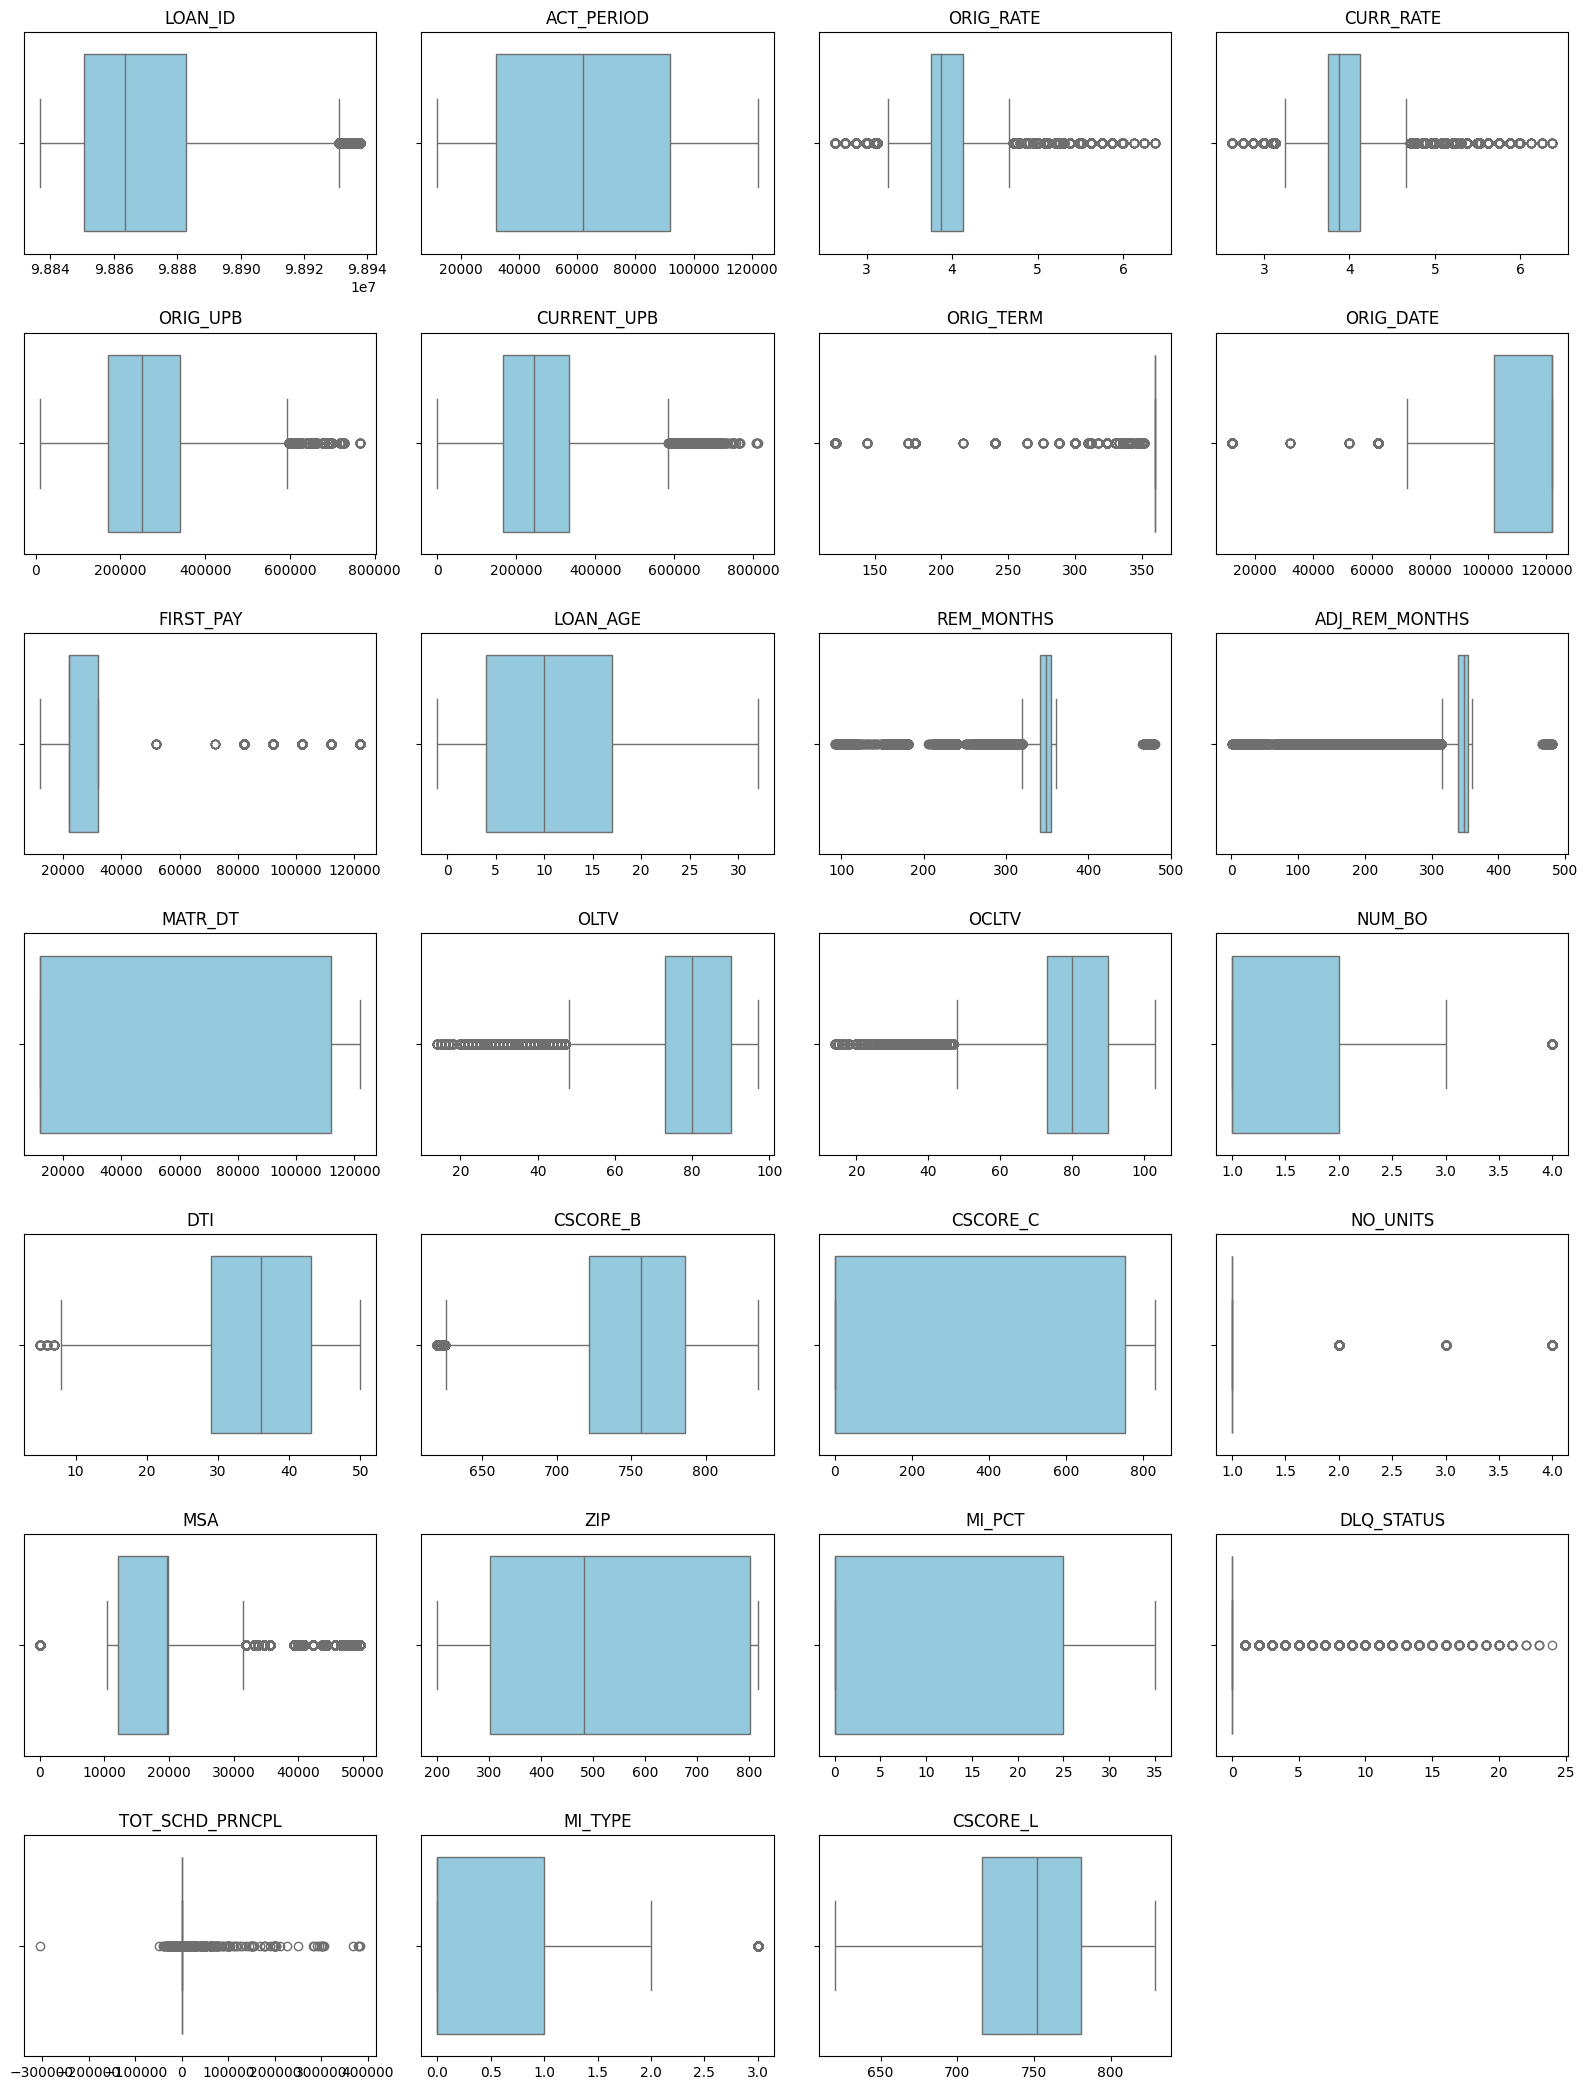

In [23]:
# 1. Select numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# 2. Setup the grid
cols_per_row = 4
n_rows = math.ceil(len(num_cols) / cols_per_row)

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(16, n_rows * 3))
axes = axes.flatten()

# 3. Generate Boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')

# 4. Clean up empty slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

New Min TOT_SCHD_PRNCPL: 0.0


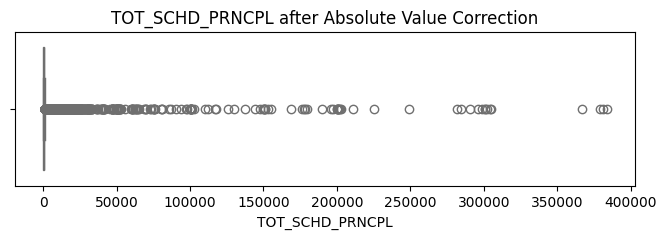

In [24]:
# 1. Flip negative Scheduled Principal to positive
df['TOT_SCHD_PRNCPL'] = df['TOT_SCHD_PRNCPL'].abs()

# 2. Verify the fix - the minimum should now be >= 0
print(f"New Min TOT_SCHD_PRNCPL: {df['TOT_SCHD_PRNCPL'].min()}")

# 3. Re-run the boxplot for this column to see the dot move
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
sns.boxplot(x=df['TOT_SCHD_PRNCPL'], color='skyblue')
plt.title('TOT_SCHD_PRNCPL after Absolute Value Correction')
plt.show()

New Min LOAN_AGE: 0.0


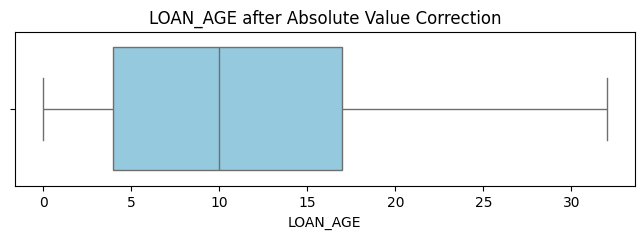

In [25]:
# 1. Flip negative Loan Age to positive
df['LOAN_AGE'] = df['LOAN_AGE'].abs()

# 2. Verify the fix - the minimum should now be >= 0
print(f"New Min LOAN_AGE: {df['LOAN_AGE'].min()}")

# 3. Re-run the boxplot for this column to see the dot move
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['LOAN_AGE'], color='skyblue')
plt.title('LOAN_AGE after Absolute Value Correction')
plt.show()

## 2.7 Data Transformation<a id='2.7_Data_Transformation'></a>

In [26]:
display(df.head())

,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,...,TOT_SCHD_PRNCPL,MI_TYPE,SERV_IND,HOMEREADY_PROGRAM_INDICATOR,RELOCATION_MORTGAGE_INDICATOR,PROPERTY_INSPECTION_WAIVER_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,FORBEARANCE_INDICATOR,ADR_TYPE,CSCORE_L
0,98836743,12020,R,Other,Other,3.625,3.625,207000.0,206411.45,240.0,...,0.00,0.0,N,N,N,A,N,7,7,797.0
1,98836743,22020,R,Other,Other,3.625,3.625,207000.0,205821.12,240.0,...,590.33,0.0,N,N,N,A,N,7,7,797.0
2,98836743,32020,R,Other,Other,3.625,3.625,207000.0,205229.01,240.0,...,592.11,0.0,N,N,N,A,N,7,7,797.0
3,98836743,42020,R,Other,Other,3.625,3.625,207000.0,204635.11,240.0,...,593.90,0.0,N,N,N,A,N,7,7,797.0
4,98836743,52020,R,Other,Other,3.625,3.625,207000.0,204039.42,240.0,...,595.69,0.0,N,N,N,A,N,7,7,797.0


- **Date Features**

The raw date features, 'ORIG_DATE', 'FIRST_PAY', 'MATR_DT' and 'ACT_PERIOD' are currently stored as numeric floats (like 122019.0), which prevents time-series analysis. This transformation standardizes them into datetime objects to enable time-based calculations.

In [27]:
# List of columns to convert
date_cols = ['ORIG_DATE', 'FIRST_PAY', 'MATR_DT', 'ACT_PERIOD']

for col in date_cols:
    # 1. Standardize to datetime objects first
    df[col] = pd.to_datetime(df[col].astype(int).astype(str).str.zfill(6), format='%m%Y')
    
    # 2. Convert to Period format to remove the '-01' day display
    df[col] = df[col].dt.to_period('M')

# Verify the result
print(df[date_cols].head())

  ORIG_DATE FIRST_PAY  MATR_DT ACT_PERIOD
0   2019-12   2020-02  2040-01    2020-01
1   2019-12   2020-02  2040-01    2020-02
2   2019-12   2020-02  2040-01    2020-03
3   2019-12   2020-02  2040-01    2020-04
4   2019-12   2020-02  2040-01    2020-05


In [28]:
df.sort_values(by=['LOAN_ID', 'ACT_PERIOD'], inplace=True)

In [29]:
df.info()

<class 'pandas.DataFrame'>
Index: 162575 entries, 74108 to 167628
Data columns (total 44 columns):
 #   Column                                Non-Null Count   Dtype    
---  ------                                --------------   -----    
 0   LOAN_ID                               162575 non-null  int64    
 1   ACT_PERIOD                            162575 non-null  period[M]
 2   CHANNEL                               162575 non-null  str      
 3   SELLER                                162575 non-null  str      
 4   SERVICER                              162575 non-null  str      
 5   ORIG_RATE                             162575 non-null  float64  
 6   CURR_RATE                             162575 non-null  float64  
 7   ORIG_UPB                              162575 non-null  float64  
 8   CURRENT_UPB                           162575 non-null  float64  
 9   ORIG_TERM                             162575 non-null  float64  
 10  ORIG_DATE                             162575 non-null  p

## 2.8 Summary<a id='2.8_Summary'></a>

After data wrangling, the dataset is now optimized for exploratory analysis and modeling. Key actions taken include:

* Dimensionality Reduction: Reduced the feature set from over 100 original columns to 44 essential variables by removing empty and constant features.

* Data Integrity: Validated 162,575 records with zero missing values across all remaining columns.

* Temporal Standardization: Converted numeric date fields (ORIG_DATE, ACT_PERIOD, etc.) into period[M] format for accurate time-series analysis.

* Outlier Treatment: Corrected logical sign errors in LOAN_AGE and TOT_SCHD_PRNCPL using absolute values while preserving meaningful high-risk values in DTI.

* Optimization: Sorted the dataframe chronologically by LOAN_ID and ACT_PERIOD to ensure logical flow for sequence-based modeling.

In [30]:
output_path = "../data/processed/mrm_data_01_cleaned.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to ../data/processed/mrm_data_01_cleaned.csv
